# PINGDINGSHANOVO ŠTEVILO


## FUNKCIJA PDS

In [4]:
#%%cython
# Hitrejsa razlicica stetja poti - ce ne deluje, odstrani zgornjo vrstico in glej spodaj se v funkciji pds!

from sage.combinat.combination import Combinations
from sage.rings.integer import Integer


def count_paths(G, start, end):
    """
    Presteje poti v neusmerjenem grafu ``G`` od ``start`` do ``end``.

    Koda je povzeta po ``sage.graphs.path_enumeration.all_paths``.
    """
    count_paths = Integer(0)
    act_path = []       # the current path
    act_path_iter = []  # the neighbor/successor-iterators of the current path
    s = start
    while True:
        if s == end:    # if path completes, add to count
            count_paths += Integer(1)
        else:
            if s not in act_path:   # we want vertices just once in a path
                act_path.append(s)  # extend current path
                act_path_iter.append(G.neighbor_iterator(s))  # save the state of the neighbor/successor-iterator of the current vertex
        s = None
        while s is None:
            try:
                s = next(act_path_iter[-1])  # try to get the next neighbor/successor, ...
            except (StopIteration):          # ... if there is none ...
                act_path.pop()               # ... go one step back
                act_path_iter.pop()
            if not act_path:                 # there is no other vertex ...
                return count_paths           # ... so we are done


def pds(G):
    """
    Presteje poti v neusmerjenem grafu ``G``.
    """
    count = G.order()
    for u, v in Combinations(G, 2):
        #count += count_paths(G, u, v) # ce ne deluje s %%cython, zakomentiraj to in odkomentiraj naslednjo vrstico
        count += len(G.all_paths(u, v))
    return count
    

## VSI GRAFI

Spodaj je definirana funkcija ustvari_vse_grafe, ki ustvari vse povezane grafe na $1, \dots ,8$ vozliščih. Funkcija vključi vse neizomorfne grafe.

In [34]:
# Funkcija, ki ustvari generatorje za vse grafe na i=1,...,12 vozliščih. Generator pomeni,
# da je v pomnilniku le navodilo za ustvarjanje grafa, ne pa celoten graf. Zaradi tega je 
# program hitrejši in porabi manj prostora na pomnilniku. Funkcija vrne 12 generatorjev,
# vsak naj bi vrnil vse grafe na i vozliščih ( en generator za vsak i)
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 9):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

len(gen_vsi_grafi())
gen_vsi_grafi = gen_vsi_grafi()

## FILTRIRANJE GRAFOV IN ISKANJE MAKSIMALNE VREDNOSTI PDS(G)

## VSI GRAFI

In [35]:
# funkcija, ki gre skozi vse grafe na 1, ... , 8 vozliščih, izračuna njihov PDS in nato ustvari slovar, kjer so
# ključi števila vozlišč, vrednost pa je največji PDS za vsakega od vozlišč izmed vseh grafov s tem številom vozlišč

# program se izvaja dobre 3 minute

def max_pds_vsi():
    max_dict_vsi = {}
    for grafi in gen_vsi_grafi:
        for G in grafi:
            maks = 0
            if pds(G) == max(maks, pds(G)):
                maks = pds(G)
        max_dict_vsi[G.order()] = maks
    return max_dict_vsi

max_dict_vsi = max_pds_vsi()
max_dict_vsi


{1: 1, 2: 3, 3: 9, 4: 34, 5: 165, 6: 981, 7: 6853, 8: 54804}

In [36]:
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 9):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh

len(gen_vsi_grafi())
gen_vsi_grafi = gen_vsi_grafi()

In [37]:
def pds_vsi():
    slovar_vsi = {} 
    for grafi in gen_vsi_grafi:
        for G in grafi:
            maks = 0
            if pds(G) == max(maks, pds(G)):
                maks = pds(G)
        slovar_vsi[G.order()] = (G, maks)
    return slovar_vsi

pds_vsi = pds_vsi()
pds_vsi

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 9),
 4: (Graph on 4 vertices, 34),
 5: (Graph on 5 vertices, 165),
 6: (Graph on 6 vertices, 981),
 7: (Graph on 7 vertices, 6853),
 8: (Graph on 8 vertices, 54804)}

#### POLNI GRAFI

Najina hipoteza pravi, da več kot ima graf povezav, večje bo njegovo pds število. Da bi se približala potrditvi te najine hipoteze bova pogledala še pds števila polnih grafov na i vozliščih za i=1,2,...8. Te bova primerjala z maksimalnimi pds števili za vse grafe. 

In [38]:
def slovar_polni_grafi():
    slovar ={}
    for gen in gen_vsi_grafi:
        for g in gen:
            graf = Graph(g)  # Pretvori v SageMath graf
            n = graf.order()  # Število vozlišč
            max_edges = n * (n - 1) // 2  # Število povezav v polnem grafu
            if graf.size() == max_edges:  # Preveri, ali ima maksimalno število povezav
                slovar[graf.order()] = (graf, pds(graf))
    return slovar

slovar_polni_grafi = slovar_polni_grafi()

In [39]:
slovar_polni_grafi

{}

## DVODELNI GRAFI

In [2]:
# funkcija ustvari generatorje dvodelnih grafov in jih shrani v seznam
def gen_dvodelni_grafi():
   gen_dvodelni = []
   for i in range(1, 11):
      gen_dvodelni.append(graphs.nauty_geng(f"{i} -b"))
   return gen_dvodelni

dvodelni_grafi = gen_dvodelni_grafi()
dvodelni_grafi

[<generator object GraphGenerators.nauty_geng at 0x7f75865f2d40>,
 <generator object GraphGenerators.nauty_geng at 0x7f75865582c0>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586558400>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586558540>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586558680>,
 <generator object GraphGenerators.nauty_geng at 0x7f75865587c0>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586558900>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586558a40>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586558b80>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586558cc0>]

In [3]:
def max_pds_dvod():
    max_dict_dvod = {}
    for grafi in gen_dvodelni_grafi():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
                max_dict_dvod[G.order()] = maks
    return max_dict_dvod

max_dict_dvod = max_pds_dvod()
max_dict_dvod

{1: 1, 2: 3, 3: 6, 4: 16, 5: 38, 6: 141, 7: 445, 8: 2232, 9: 8859, 10: 55735}

In [42]:
# funkcija, ki ustvari slovar z maksimalnimi vrednostmi PDS in pripadajočim dvodelnim grafom

def pds_dvodelni():
    slovar_dvodelni = {}
    for grafi in gen_dvodelni_grafi():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
                slovar_dvodelni[G.order()] = (G, pds(G))
    return slovar_dvodelni


slovar_dvodelni = pds_dvodelni()
slovar_dvodelni

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 16),
 5: (Graph on 5 vertices, 38),
 6: (Graph on 6 vertices, 141),
 7: (Graph on 7 vertices, 445),
 8: (Graph on 8 vertices, 2232),
 9: (Graph on 9 vertices, 8859),
 10: (Graph on 10 vertices, 55735)}

In [5]:
def pds_dvod_grafi():
    slovar_dvod_grafi = {}
    st_max_grafov= {}
    for gen in dvodelni_grafi:
        for g in gen:
            if pds(g) == max_dict_dvod.get(g.order()):
                if g.order() not in slovar_dvod_grafi:
                    slovar_dvod_grafi[g.order()] = []
                    st_max_grafov[g.order()] = 0

                slovar_dvod_grafi[g.order()].append(g)
                st_max_grafov[g.order()] += 1
    return slovar_dvod_grafi, st_max_grafov

slovar_dvod_grafi, st_max_grafov = pds_dvod_grafi()
slovar_dvod_grafi
st_max_grafov

{1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}

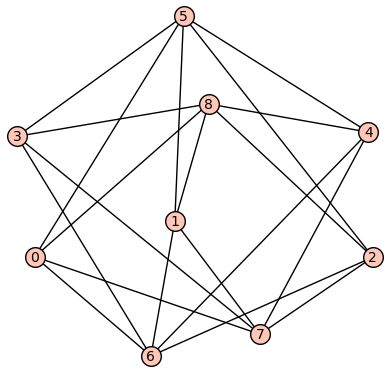

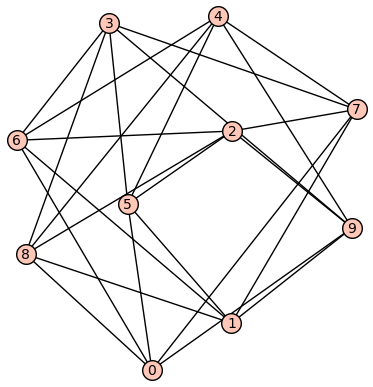

True

In [13]:
G_dvod_9, _ = slovar_dvodelni[9]
G_dvod_9.show()
G_dvod_10, _ = slovar_dvodelni[10]
G_dvod_10.show()	
G_dvod_10.is_triangle_free()

## GRAFI BREZ CIKLOV DOLŽINE TRI

Naslednja funkcija iz množice vseh grafov izbere tiste, ki ne vsebujejo trikotnikov oz. cikov dolžine 3. To stori za vse grafe z 1,...,12 vozlišči

In [6]:
def gen_grafi_brez_trikotnikov():
    gen_brez_trik = []
    for i in range(1, 11):
        gen_brez_trik.append(graphs.nauty_geng(f"{i} -c -t"))
    return gen_brez_trik

grafi_brez_trikotnikov = gen_grafi_brez_trikotnikov()
grafi_brez_trikotnikov

[<generator object GraphGenerators.nauty_geng at 0x7f75865596c0>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586559800>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586559a80>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586559bc0>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586559d00>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586559e40>,
 <generator object GraphGenerators.nauty_geng at 0x7f7586559f80>,
 <generator object GraphGenerators.nauty_geng at 0x7f758655a0c0>,
 <generator object GraphGenerators.nauty_geng at 0x7f758655a200>,
 <generator object GraphGenerators.nauty_geng at 0x7f758655a340>]

Naslednja funkcija med grafi poišče max pds v skupini grafov brez trikotnikov.


In [8]:
def max_pds_trik():
    max_dict_trik = {}
    for grafi in gen_grafi_brez_trikotnikov():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
            max_dict_trik[G.order()] = maks
    return max_dict_trik

max_dict_trik = max_pds_trik()

In [10]:
max_dict_trik

{1: 1, 2: 3, 3: 6, 4: 16, 5: 38, 6: 141, 7: 445, 8: 2232, 9: 8859, 10: 55735}

Za vsak graf brez trikotnikov izračunamo pds. Glede na število poti, naslednja funkcija oblikuje slovar, ki vsakemu številu vozlišč od 1 do 12 pripiše preštete poti na vseh grafih s takim številom vozlišč.


In [13]:
# funkcija, ki ustvari slovar z maksimalnimi vrednostmi PDS in grafom

def pds_brez_trikotnikov():
    slovar_brez_trikotnikov = {}
    for grafi in gen_grafi_brez_trikotnikov():
        maks = 0
        for G in grafi:
            if pds(G) > maks:
                maks = pds(G)
                slovar_brez_trikotnikov[G.order()] = (G, pds(G))
    return slovar_brez_trikotnikov

slovar_brez_trikotnikov = pds_brez_trikotnikov()
slovar_brez_trikotnikov

{1: (Graph on 1 vertex, 1),
 2: (Graph on 2 vertices, 3),
 3: (Graph on 3 vertices, 6),
 4: (Graph on 4 vertices, 16),
 5: (Graph on 5 vertices, 38),
 6: (Graph on 6 vertices, 141),
 7: (Graph on 7 vertices, 445),
 8: (Graph on 8 vertices, 2232),
 9: (Graph on 9 vertices, 8859),
 10: (Graph on 10 vertices, 55735)}

In [11]:
def pds_brez_trik():
    slovar_brez_trik = {}
    st_max_grafov= {}
    for gen in grafi_brez_trikotnikov:
        for g in gen:
            if pds(g) == max_dict_trik.get(g.order()):
                if g.order() not in slovar_brez_trik:
                    slovar_brez_trik[g.order()] = []
                    st_max_grafov[g.order()] = 0

                slovar_brez_trik[g.order()].append(g)
                st_max_grafov[g.order()] += 1
    return slovar_brez_trik, st_max_grafov

slovar_brez_trik, st_max_grafov= pds_brez_trik()
slovar_brez_trik
st_max_grafov

{2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1, 10: 1}

### PRIMERJAVA GRAFOV BREZ TRIKOTNIKOV IN DVODELNIH GRAFOV PRI DOSEGANJU MAKSIMALNIH VREDNOSTI PDS

Kot smo lahko opazili, vsebujeta slovarja grafov brez trikotnikov in dvodelnih grafov enake vrednosti PDS. Poglejmo si še grafe, od katerih je odvisna ta vrednost. Ali so si tudi ti med seboj enaki?

In [12]:
# funkcija preveri ali so vsi grafi, ki so pri obeh skupinah grafov dosegali maksimalne vrednosti PDS med seboj izomorfni in vrne True,
# če pa si katera od grafov med seboj nista enaka vrne False
def preveri_enakost_grafov():
    for i in range(1, 11):
        G_dvod, _ = slovar_dvodelni[i]
        G_brez_trik, _ = slovar_brez_trikotnikov[i]
        if G_dvod.is_isomorphic(G_brez_trik):
            pass
        else:
            return False
    return True

je_enako = preveri_enakost_grafov()
je_enako

NameError: name 'slovar_dvodelni' is not defined

Kot lahko vidimo, so si prav vsi grafi med seboj izomorfni. Ker pa je množica dvodelnih grafov vsebovana v množici grafov brez trikotnikov, vemo da bo Pingdingshanovo število pri družini grafov brez trikotnikov enako ali kvečjemu večje Pingdingshanovemu številu pri družini dvodelnih grafov. Izkaže pa se, da je za vsako vozlišče natanko enako, kar pomeni, da dvodelni grafi dosegajo maksimalne vrednosti PDS tudi znotraj družine grafov brez trikotnikov.

A zakaj je temu tako? Kakšne so lastnosti dvodelnih grafov, ki jim omogočajo tako veliko PDS število? Zakaj kljub večjim omejitvam dvodelnih grafov (ki izhajajo iz definicije), imajo ti še vedno tako veliko PDS število?

Spodaj je zapisana funkcija, ki preveri ali so ti grafi polni dvodelni.

In [ ]:
def je_polni_dvodelni(G):
    if not G.is_bipartite():
        return False
    # disjunktni množici vozlišč dvodelnega grafa
    disjunktni_mnozici = G.bipartite_sets()
    
    # preveri če je vsako vozlišče iz prve množice povezano z vsakim vozliščem iz druge množice
    for u in disjunktni_mnozici[0]:
        for v in disjunktni_mnozici[1]:
            if not G.has_edge(u, v):
                return False
    return True


# funkcija vrne True, če so vsi grafi polni dvodelni in False sicer
def so_polni_dvodelni():
    for kljuc in slovar_brez_trikotnikov:
        G, _ = slovar_brez_trikotnikov[kljuc]
        if je_polni_dvodelni(G):
            pass
        else:
            return False
    return True

# rezultati
so_polni_dvodelni = so_polni_dvodelni()
so_polni_dvodelni


True

Kot lahko vidimo v zgornji kodi so torej vsi ti grafi polni dvodelni. Torej polni dvodelni grafi tudi v skupini grafov brez trikotnikov dosegajo največjo PDS vrednost. To pa zato, ker imajo polni dvodelni grafi največje možno število povezav, ki ga lahko imajo, da pri tem ne tvorijo nobenega trikotnega cikla. Število teh povezav je enako $m \times n$, kjer je $m$ število vozlišč v prvi disjunktni množici vozlišč dvodelnega grafa, $n$ pa število teh vozlišč v drugi disjunktni množici.

Prav tako je vredno omeniti tudi, da si razreda dvodelnih grafov in grafov brez trikotnikov pravzaprav nista tako različna v velikosti. Kar pomeni, da je velika večina grafov brez trikotnikov tudi dvodelnih, in zato je nekako smiselno, da bodo isti grafi, ki dosegajo maksimume $pds$ v skupini dvodelnih grafov, dosegali maksimume tudi v tej skupini grafov brez trikotnikov.

## KUBIČNI GRAFI

Za kubične grafe velja, da imajo vsa vozlišča v takem grafu stopnjo natanko 3 (pravimo jim tudi 3-regularni grafi). Lastnost kubičnih grafov je tudi, da jih lahko dobimo le na sodo mnogo vozliščih. Spodnji funkciji služita generaciji teh grafov na i vozliščih za i=1,...,12 in štetju vseh poti na teh grafih.

In [49]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(4, 17 ,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()
kub_grafi

[<generator object GraphGenerators.nauty_geng at 0x7f2885dd86d0>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd9150>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd8820>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd8970>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd8ac0>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd8c10>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd8d60>]

In [50]:
# funkcija, ki izračuna maksimalno št. poti
def max_pds_kub():
    max_dict_kub = {}
    for gen in gen_kub_grafi():
        maks = 0
        for G in gen:
            if pds(G) > maks:
                maks = pds(G)
                max_dict_kub[G.order()] = maks
    return max_dict_kub

max_dict_kub = max_pds_kub()
max_dict_kub

{4: 34, 6: 141, 8: 460, 10: 1375, 12: 3746, 14: 9905, 16: 24664}

In [51]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(4, 17 ,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()
kub_grafi

[<generator object GraphGenerators.nauty_geng at 0x7f2885dd92a0>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd9930>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd8eb0>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd93f0>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd9540>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd9690>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd97e0>]

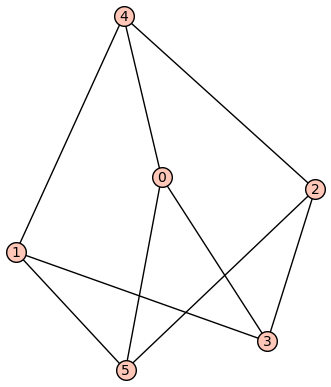

141
False


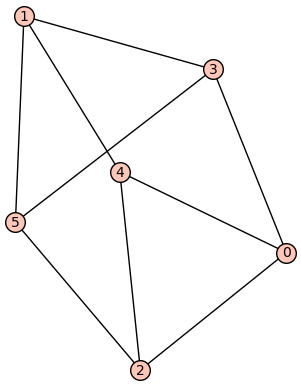

135
True


In [52]:
for g in kub_grafi[1]:
    g.show()
    print(pds(g))
    print(g.is_planar())

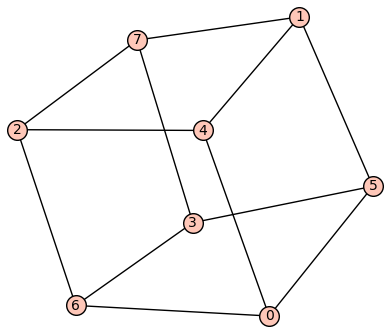

452
True


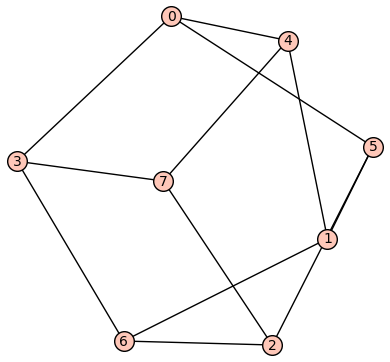

460
False


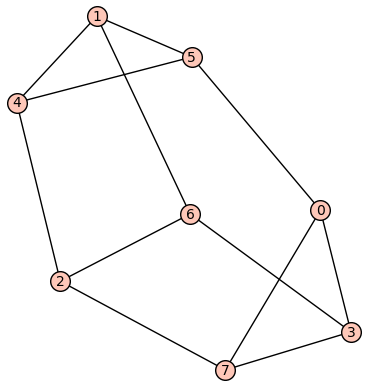

426
True


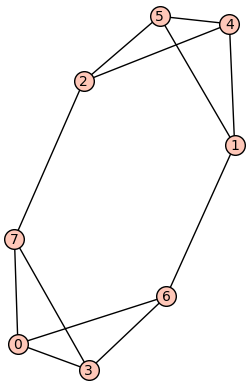

376
True


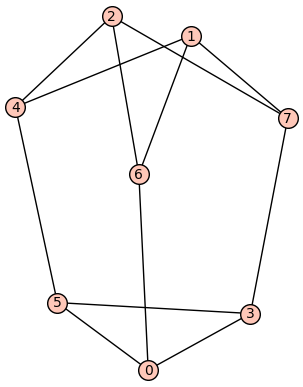

446
False


In [53]:
for g in kub_grafi[2]:
    g.show()
    print(pds(g))
    print(g.is_planar())

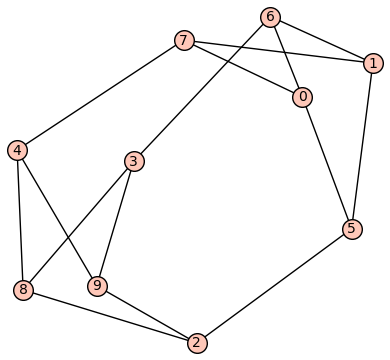

1303
False


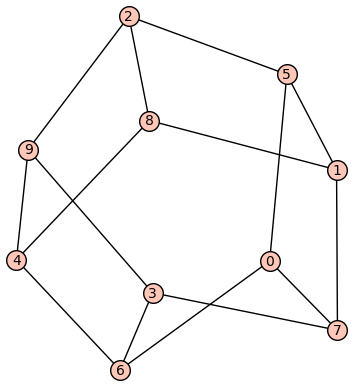

1305
False


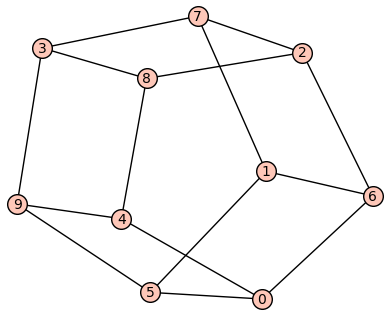

1295
True


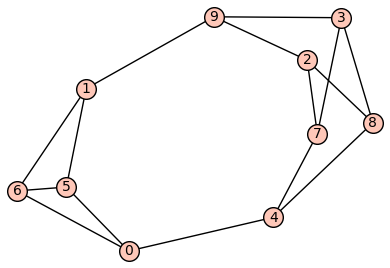

1093
False


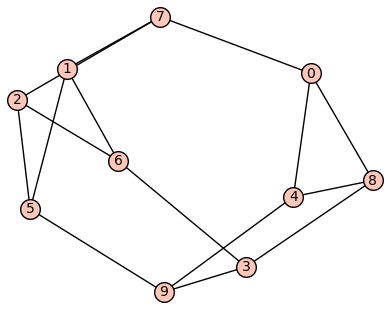

1241
False


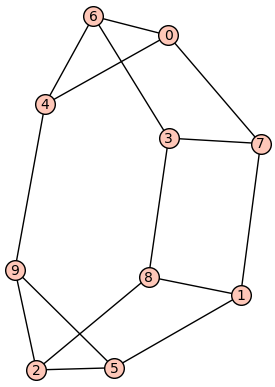

1185
True


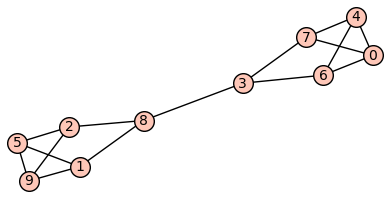

643
True


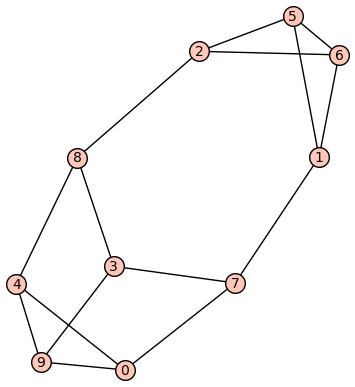

1039
True


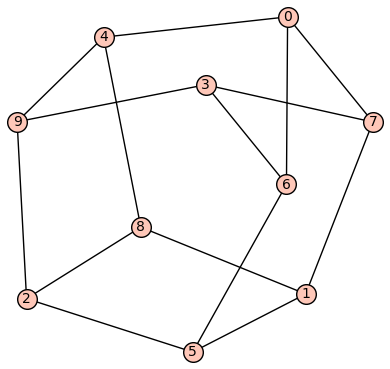

1335
False


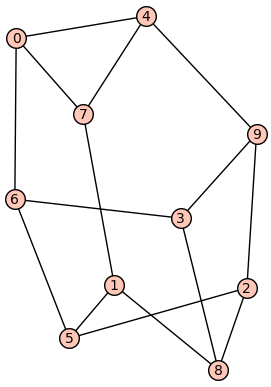

1279
False


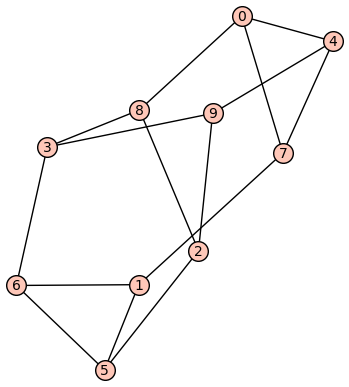

1243
False


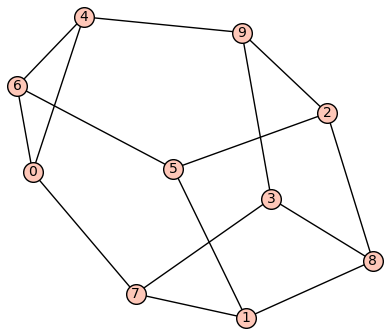

1255
True


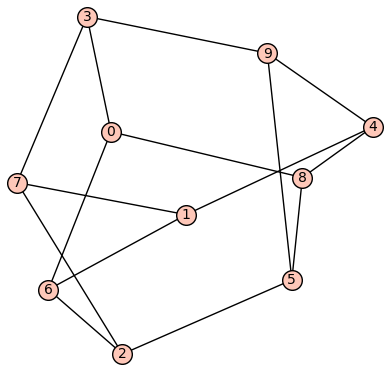

1351
False


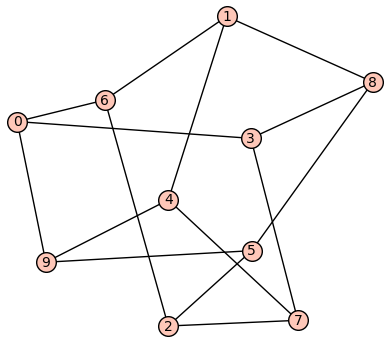

1375
False


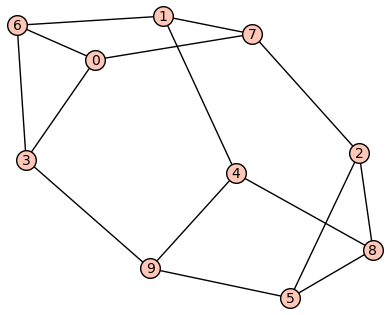

1181
True


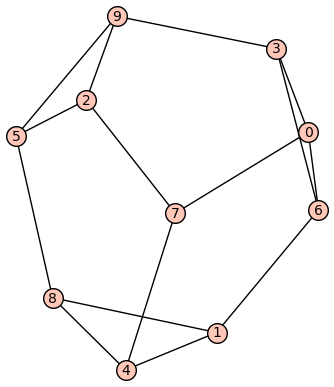

1183
True


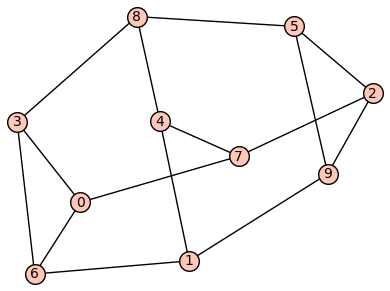

1237
False


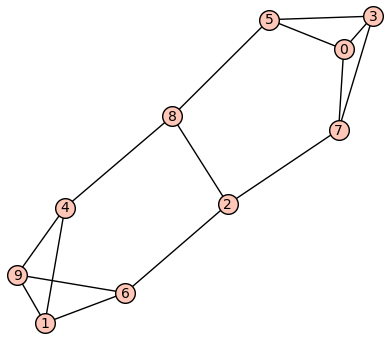

915
True


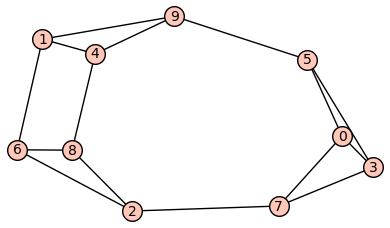

1049
True


In [54]:
for g in kub_grafi[3]:
    g.show()
    print(pds(g))
    print(g.is_planar())

Zgoraj sem izrisala kubične grafe za 6,8,10 vozlišč. Iz izrisanih grafov, njihovih pds-jev in planarnosti sklepam, da neplanarnost grafa zvišuje njegov pds(v slošnem, prizma na 10 vozliščih je planarna in ima večji kot kakšen drug graf na 10 vozliščih, ki ni planaren). Pravtako se zdi, da večja kot bo minimalna prerezna množica povezav večji bo pds (moč te množice nikoli ne bo večja od 3).

In [55]:
def gen_kub_grafi():
    gen_kub_grafi = []
    for i in range(4, 17 ,2):
        gen_kub_grafi.append(graphs.nauty_geng(f"{i} -c -d3 -D3"))
    return gen_kub_grafi

kub_grafi = gen_kub_grafi()
kub_grafi

[<generator object GraphGenerators.nauty_geng at 0x7f2885dd9bd0>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd9d20>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd9e70>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dd9fc0>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dda110>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dda260>,
 <generator object GraphGenerators.nauty_geng at 0x7f2885dda3b0>]

Želela sem preveriti koliko kubičnih grafov na i vozliščih doseže max pds. izkaže se,da za vsak i obstaja samo en tak graf. Naslednjih par funkcij je namenjeih temu izračunu in izrisu grafov v katerem je dosežen maksimalen pds.

In [56]:
def pds_kub_grafi():
    slovar_kub_grafi = {}
    st_max_grafov= {}
    for gen in kub_grafi:
        for g in gen:
            if pds(g) == max_dict_kub.get(g.order()):
                if g.order() not in slovar_kub_grafi:
                    slovar_kub_grafi[g.order()] = []
                    st_max_grafov[g.order()] = 0

                slovar_kub_grafi[g.order()].append(g)
                st_max_grafov[g.order()] +=1
    return slovar_kub_grafi, st_max_grafov

slovar_kub_grafi, st_max_grafov= pds_kub_grafi()
slovar_kub_grafi
st_max_grafov

{4: 1, 6: 1, 8: 1, 10: 1, 12: 1, 14: 1, 16: 1}

In [57]:
slovar_kub_grafi

{4: [Graph on 4 vertices],
 6: [Graph on 6 vertices],
 8: [Graph on 8 vertices],
 10: [Graph on 10 vertices],
 12: [Graph on 12 vertices],
 14: [Graph on 14 vertices],
 16: [Graph on 16 vertices]}

Iz opazovanja zgoraj izrisanih grafov sem predposatavila, da grafi kjer do dosežen max ne bodo planarni. To sem želela preveriti. Pravtako me je zanimala moč minimalni prereznih možic, vendar nisem našla primerega načina za preverjanje tega pogoja.

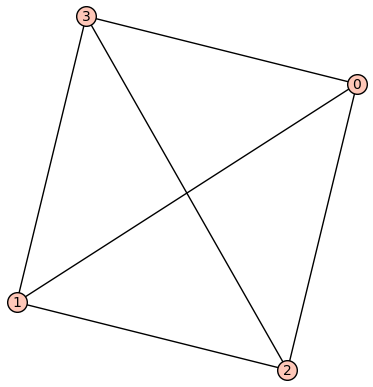

True


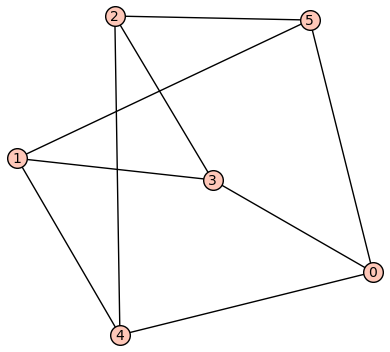

False


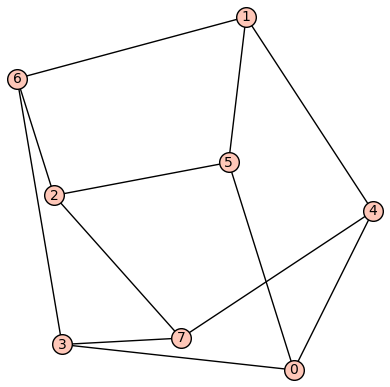

False


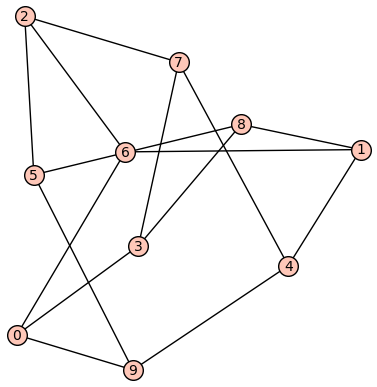

False


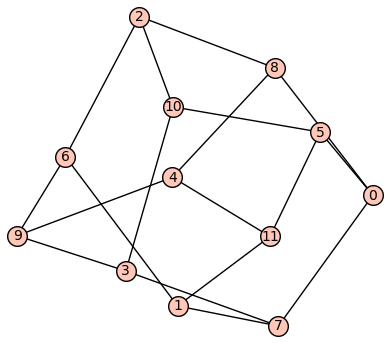

False


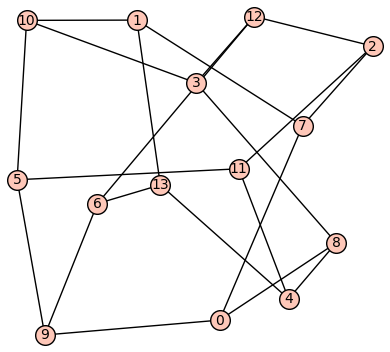

False


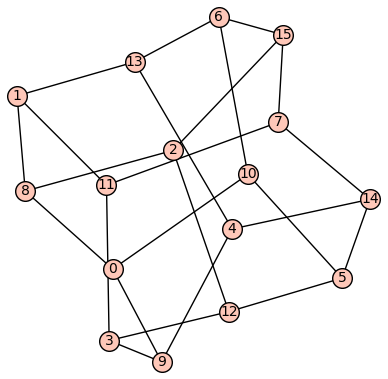

False


In [58]:
# risanje grafov
for i in range(4, 17 ,2):
    kub= slovar_kub_grafi[i][0]
    kub.show()
    print(kub.is_planar())
    


# kub_4 = slovar_kub_grafi[4][0]
# kub_4.show()
# kub_6 = slovar_kub_grafi[6][0]
# kub_6.show()
# kub_8 = slovar_kub_grafi[8][0]
# kub_8.show()
# kub_10 = slovar_kub_grafi[10][0]
# kub_10.show()
# kub_12 = slovar_kub_grafi[12][0]
# kub_12.show()
# kub_14 = slovar_kub_grafi[14][0]
# kub_14.show()
# kub_16 = slovar_kub_grafi[16][0]
# kub_16.show()

Iz zgornjega testa lahko vidimo, da so vsi grafi, pri katerih je dosežen maksimum neplanarni, razen za 4 vozlišča(na štirih vozliščih poznamo le en kubični graf). Hipoteza za višje i, bo potem trdila, da bo tudi pri njih graf z višjim pds-jem neplanaren.

In [59]:
def Prizma(st_vozlisc):
    prizma = graphs.CycleGraph(st_vozlisc//2).cartesian_product(graphs.PathGraph(2))
    return prizma

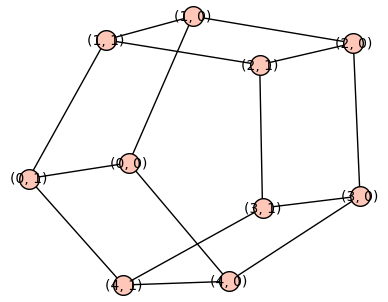

In [60]:
prizma_10= Prizma(10)
prizma_10.show()

In [61]:
kub_10.is_isomorphic(prizma_10)

NameError: name 'kub_10' is not defined

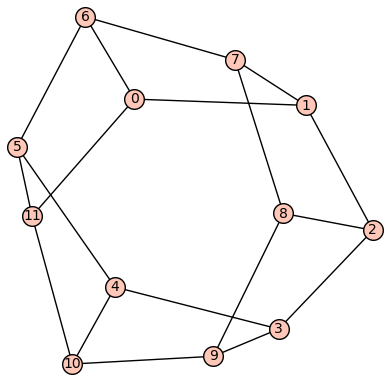

In [57]:
def mobius_band_graph(n):
    if n % 2 != 0:
        raise ValueError("Število vozlišč mora biti sodo.")
    
    G = Graph()
    for i in range(n):
        G.add_edge(i, (i + 1) % n)  # Povezava v krogu
    
    # Dodaj zasuk povezav
    for i in range(n // 2):
        G.add_edge(i, (i + n // 2) % n)  # Povezava nasproti ležečih vozlišč
    
    return G

# Ustvari Möbiusov trak z 6 vozlišči
mobius_trak = mobius_band_graph(12)
mobius_trak.show() 

## POVZETEK PRVE TOČKE


V zgornji kodi sva s pomočjo nauty.geng metod poiskala grafe v posameznih družinah, ki imajo na i=1,...,8 vozliščih (za kubične na 4,6,8) največje števlo pds. 

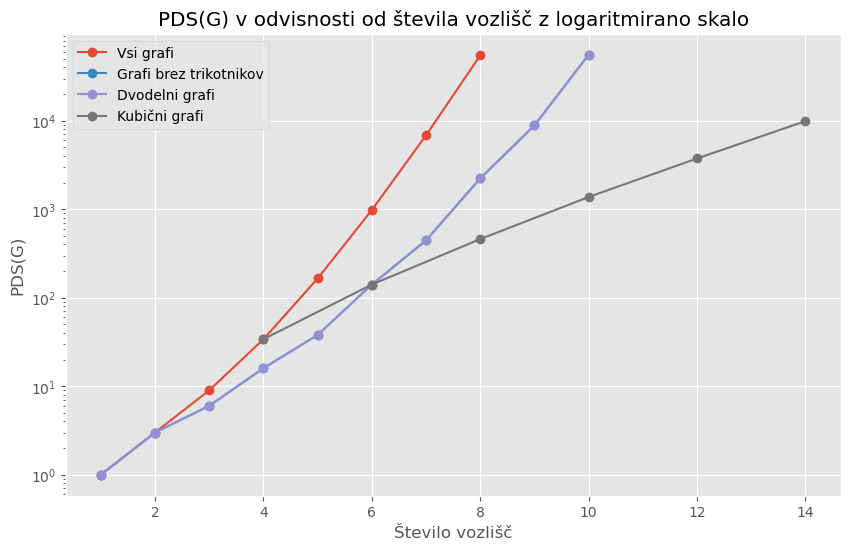

In [33]:
# funkcija za vhodne podatke vzame štiri slovarje, ki vsebujejo maksimalno PDS število na vsakem vozlišču
# za vsakega od štirih tipov grafov, ki sva jih znotraj naloge obravnavala in nato izriše te vrednosti

import matplotlib.pyplot as plt

def graf_pds(vsi, trik, dvod, kub):
    x_1, y_1 = list(vsi.keys()), list(vsi.values())
    x_2, y_2 = list(trik.keys()), list(trik.values())
    x_3, y_3 = list(dvod.keys()), list(dvod.values())
    x_4, y_4 = list(kub.keys()), list(kub.values())
    
    plt.style.use('ggplot')	

    plt.figure(figsize = (10, 6))
    plt.plot(x_1, y_1, marker='o', label='Vsi grafi')
    plt.plot(x_2, y_2, marker='o', label='Grafi brez trikotnikov')
    plt.plot(x_3, y_3, marker='o', label='Dvodelni grafi')
    plt.plot(x_4, y_4, marker='o', label='Kubični grafi')
    
    plt.xlabel('Število vozlišč')
    plt.ylabel('PDS(G)')
    plt.yscale('log')
    plt.title('PDS(G) v odvisnosti od števila vozlišč z logaritmirano skalo') 
    plt.legend()
    plt.grid(True)
    plt.show()
    

graf_pds(max_dict_vsi, max_dict_trik, max_dict_dvod, max_dict_kub)

Iz grafa je razvidno, da največje $pds$ vrednosti dosega družina vseh grafov. Družina dvodelnih grafov in grafov brez trikotnikov imata na vsakem številu vozlišč enako $pds$ število, kar smo pokazali že zgoraj in se zato njuni črti popolnoma prekrivata. Najmanjše Pingdingshanove vrednosti pa dosega družina kubičnih grafov.

## STOHASTIČNA ANALIZA

Stohastične analize se bova lotila tako, da bova grafom z maksimalnim pds-jem odstanila naključno povezavo in opazovala kako se mu spreminja pds. Najina predspostavka namreč je, da več kot ima graf povezav, višji bo njegov pds. Iz te predpostavke bi sledilo, da bodo najvišje pds.je imeli polni grafi na i vozliščih. pogledala bova razmerja med številom povezav in pds-jem v originalnem grafu in v tistem z odstranjeno povezavo.


Naslednja funkcija namenjena odstranitvi naključne povezave v grafu, ki ni most. Zadnji podatek je ključen, da novo dobljeni graf ostane povezan (pds iščemo zgolj na povezanih grafih).

In [ ]:
import random
def odstranitev_povezave(graf):
    if not graf.edges():
        return graf
    else:
        mostovi = set(graf.bridges())
        vse_povezave = set(graf.edges())
        ne_most = vse_povezave - mostovi
        if not ne_most:
            return graf
        else:
            nak_pov = random.choice(list(ne_most))
            graf.delete_edge(nak_pov)
            return graf


In [48]:
def stevilo_povezav(slovar):
    slovar_povezav = {}
    for kljuc in slovar.keys():
        graf,maks = slovar[kljuc]
        slovar_povezav[kljuc]= graf.num_edges()
    return slovar_povezav


#### VSI GRAFI

#### DVODELNI GRAFI

Stohastična analiza dvodelnih grafov bo potekala tako, da bova na številih vozlišč, na katerih rezultatov nisva dobila z 'brute-force' načinom, skušala najina predvidevanja potrditi stohastično. Torej tako, da bova naključno dodajala povezave in na koncu proučila, kateri tip grafa doseže največji $pds$.

In [404]:
# funkcija zgenerira slučajen dvodelen graf na i vozliščih in ga posodablja z dodajanjem ali odstranjevanjem povezav
import random

def stohasticna_dvodelni(i):
    pogoj = True
    while pogoj is True:
        # najprej ustvari naključno particijo množic vozlišč
        leva_particija = random.randint(1, i - 1)
        desna_particija = i - leva_particija
        # ustvari naključen dvodelen graf, ki z verjetnostjo 50% ustvari povezavo med dvema vozliščema
        G = graphs.RandomBipartite(leva_particija, desna_particija, 0.4)
        # preveri, če je graf povezan
        if G.is_connected():
            pogoj = False
    return G

# primer zgeneriranega dvodelnega grafa na 11 vozliščih
G = stohasticna_dvodelni(8)
G
pds(G)

96

In [415]:
H = G
l, d = H.bipartite_sets()
l, d
u = random.choice(list(l))
u
v = random.choice(list(d))
v
H.add_edge(u, v)
(len(G.edges()), len(H.edges()))

(12, 12)

Zdaj, ko imamo funkcijo, ki naključno generira dvodelne grafe, potrebujemo še funkcijo, ki tem grafom naključno dodaja povezave in preverja, kaj se dogaja z njihovo Pingdingshanovo vrednostjo.

In [434]:
def dodaj_povezavo(G):
    l, d = G.bipartite_sets()
    while True:
        u = random.choice(list(l))
        v = random.choice(list(d))
        if not G.has_edge(u, v):
            G.add_edge(u, v)
            return G

G = stohasticna_dvodelni(8)
ajc_mat = G.adjacency_matrix()

H = dodaj_povezavo(G)
G_fix = Graph(ajc_mat)
len(H.edges()), len(G_fix.edges())
pds(G_fix), pds(H)

(36, 58)

In [263]:

def nakljucna_povezava_dvodelni(G):
    lala = []
    H = G
    l, r = H.bipartite_sets()
    pogoj = True
    while pogoj == True:
        u = random.choice(list(l))
        v = random.choice(list(r))
        return (u, v) in H.edges()
    
G = stohasticna_dvodelni(8)
a = nakljucna_povezava_dvodelni(G)
a

False

#### GRAFI BREZ TRIKOTNIKOV 

#### KUBIČNI GRAFI

Najina hipoteza za kubične grafe na več vozliščih pravi, da bo maksimalen pds dosežen v neplanarnem grafu. Stohastične analize se bova lotila tako, da bova vzela naključen kubični graf na i vozliščih, v njem izbrala dve povezavi, ki ne bosta imeli skupnih krajišč. pomembno je paziti tudi, da ta štiri vozlišča niso direktno povezana med sabo, nato bova izračunala pds za nov graf in si ta graf zapomnila le v primeru, da bo pds novega večji od pdsja starega grafa.

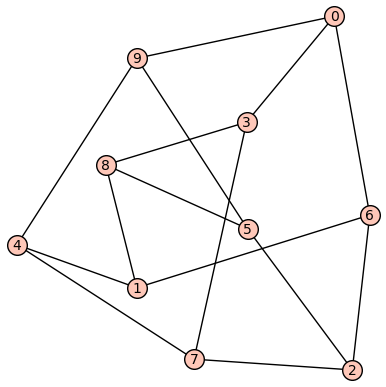

In [82]:
kub_10 = slovar_kub_grafi[10][0]
kub_10.show()

In [80]:
def zamenjava_povezav(graf):
    graf1 = graf.copy()
    pov_1 = random.choice(graf1.edges())
    u,v= pov_1[:2]
    sosedi_u = set(graf1.neighbors(u))
    sosedi_v = set(graf1.neighbors(v))
    preostale_pov = [
        e for e in graf1.edges()
        if not (e[0] in (sosedi_u|sosedi_v) or e[1] in (sosedi_u|sosedi_v) )]
    pov_2 = random.choice(preostale_pov)
    u_1, v_1 = pov_2[:2]
    graf1.delete_edge(u,v)
    graf1.delete_edge(u_1,v_1)
    graf1.add_edge(u,u_1)
    graf1.add_edge(v,v_1)
    return graf1
      

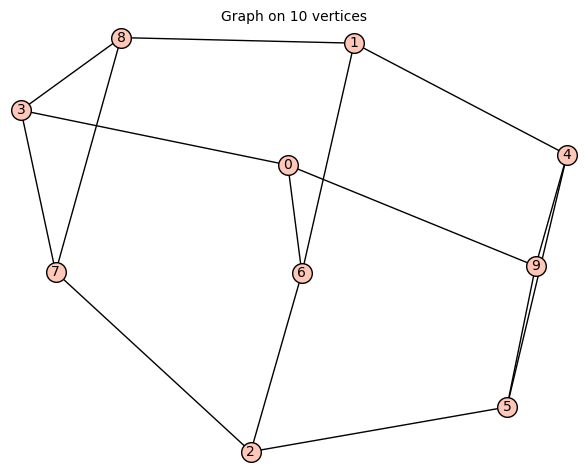

In [83]:
zamenjava_povezav(kub_10)

In [2]:
from sage.all import *
import random
def stoh_kub_grafi(st_voz,st_iteracij):
    iteracije = 0
    # kandidati = list(graphs.nauty_geng(f"{st_voz} -c -d3 -D3"))
    # graf = random.choice(kandidati)
    graf=graphs.RandomRegular(3, st_voz)
    graf_pds = pds(graf)
    while iteracije < st_iteracij:
        graf1 = graf.copy()
        pov_1 = random.choice(graf1.edges())
        u,v= pov_1[:2]
        sosedi_u = set(graf1.neighbors(u))
        sosedi_v = set(graf1.neighbors(v))
        preostale_pov = [
            e for e in graf1.edges()
            if not (e[0] in (sosedi_u|sosedi_v) or e[1] in (sosedi_u|sosedi_v) )]
        pov_2 = random.choice(preostale_pov)
        u_1, v_1 = pov_2[:2]
        graf1.delete_edge(u,v)
        graf1.delete_edge(u_1,v_1)
        graf1.add_edge(u,u_1)
        graf1.add_edge(v,v_1)
        pds_graf1 = pds(graf1)
        if pds_graf1 > graf_pds:
            graf= graf1
            graf_pds=pds_graf1
        iteracije +=1
    return graf,graf_pds


In [94]:
kub_20, kub_20_pds = stoh_kub_grafi(20, 10000)

In [95]:
kub_20.is_planar()

False

In [97]:
kub_20_pds

144192

In [103]:
kub_22, kub_22_pds = stoh_kub_grafi(22, 1000)

In [104]:
kub_22_pds

338303

In [105]:
kub_22.is_planar()

False

In [107]:
kub_24, kub_24_pds = stoh_kub_grafi(24, 1000)

In [108]:
kub_24_pds

789638

In [109]:
kub_24.is_planar()

False

In [110]:
kub_26, kub_26_pds = stoh_kub_grafi(26, 1000)

In [111]:
kub_26_pds

1806091

In [112]:
kub_26.is_planar()

False

In [115]:
kub_28,kub_28_pds = stoh_kub_grafi(28,300)

In [117]:
kub_28_pds

4095404

In [118]:
kub_28.is_planar()

False

In [6]:
kub_30, kub_30_pds = stoh_kub_grafi(30,10)

In [7]:
kub_30_pds

8389823

In [8]:
kub_30.is_planar()

False

In [53]:
def gen_vsi_grafi():
    gen_vseh = []
    for i in range(1, 9):
        gen_vseh.append(graphs.nauty_geng(f"{i} -c"))
    return gen_vseh
  
len(gen_vsi_grafi())
gen_vsi_grafi = gen_vsi_grafi()

: 

: 